In [1]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestRegressor

# # Generating the dataset (already done previously)
# np.random.seed(42)

# n_committees = 50
# committee_ids = np.arange(1, n_committees + 1)
# committee_members = np.random.randint(50, 300, size=n_committees)
# recent_posts = np.random.randint(5, 30, size=n_committees)
# events = np.random.randint(1, 10, size=n_committees)
# user_rating = np.round(np.random.uniform(3.0, 5.0, size=n_committees), 1)

# df = pd.DataFrame({
#     'committee_id': committee_ids,
#     'committee_members': committee_members,
#     'recent_posts': recent_posts,
#     'events': events,
#     'user_rating': user_rating
# })

# # Normalize the features
# scaler = MinMaxScaler()
# df[['committee_members', 'recent_posts', 'events', 'user_rating']] = scaler.fit_transform(df[['committee_members', 'recent_posts', 'events', 'user_rating']])

# # Calculate the popularity score (you can adjust the formula as needed)
# df['popularity_score'] = (df['committee_members'] * 0.4 +
#                           df['recent_posts'] * 0.3 +
#                           df['events'] * 0.2 +
#                           df['user_rating'] * 0.1)

# # Split the dataset into features and target
# X = df[['committee_members', 'recent_posts', 'events', 'user_rating']]  # Features
# y = df['popularity_score']  # Target (popularity score)

# # Train a Random Forest Regressor model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X, y)

# # Predict the popularity score for each committee
# df['predicted_popularity'] = model.predict(X)

# # Sort the committees by predicted popularity score and recommend the top N
# top_n = 5  # Number of committees to recommend
# recommended_committees = df.sort_values(by='predicted_popularity', ascending=False).head(top_n)

# # Display the recommendations
# print("Top Recommended Committees:")
# print(recommended_committees[['committee_id', 'predicted_popularity']])


Top Recommended Committees:
    committee_id  predicted_popularity
13            14              0.819990
6              7              0.803074
11            12              0.760846
29            30              0.749407
45            46              0.740677


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Import the dataset from the CSV file
df = pd.read_csv('./dataset/committee_data.csv')

# Check if the CSV was loaded correctly
print(df.head())

# Normalize the features
scaler = MinMaxScaler()
df[['committee_members', 'recent_posts', 'events', 'user_rating']] = scaler.fit_transform(df[['committee_members', 'recent_posts', 'events', 'user_rating']])

# Calculate the popularity score (you can adjust the formula as needed)
df['popularity_score'] = (df['committee_members'] * 0.4 +
                          df['recent_posts'] * 0.3 +
                          df['events'] * 0.2 +
                          df['user_rating'] * 0.1)

# Split the dataset into features and target
X = df[['committee_members', 'recent_posts', 'events', 'user_rating']]  # Features
y = df['popularity_score']  # Target (popularity score)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict the popularity score for each committee
df['predicted_popularity'] = model.predict(X)

# Sort the committees by predicted popularity score and recommend the top N
top_n = 5  # Number of committees to recommend
recommended_committees = df.sort_values(by='predicted_popularity', ascending=False).head(top_n)

# Display the recommendations
print("Top Recommended Committees:")
print(recommended_committees[['committee_id', 'predicted_popularity']])


   committee_id  committee_members  recent_posts  events  user_rating
0             1                 61            59      12          5.0
1             2                 24            15       2          6.4
2             3                 81            32      18          5.3
3             4                 70            50       7          9.4
4             5                 30            36      26          1.7
Top Recommended Committees:
      committee_id  predicted_popularity
4834          4835              0.948684
576            577              0.943850
2064          2065              0.941080
2667          2668              0.930049
878            879              0.924026


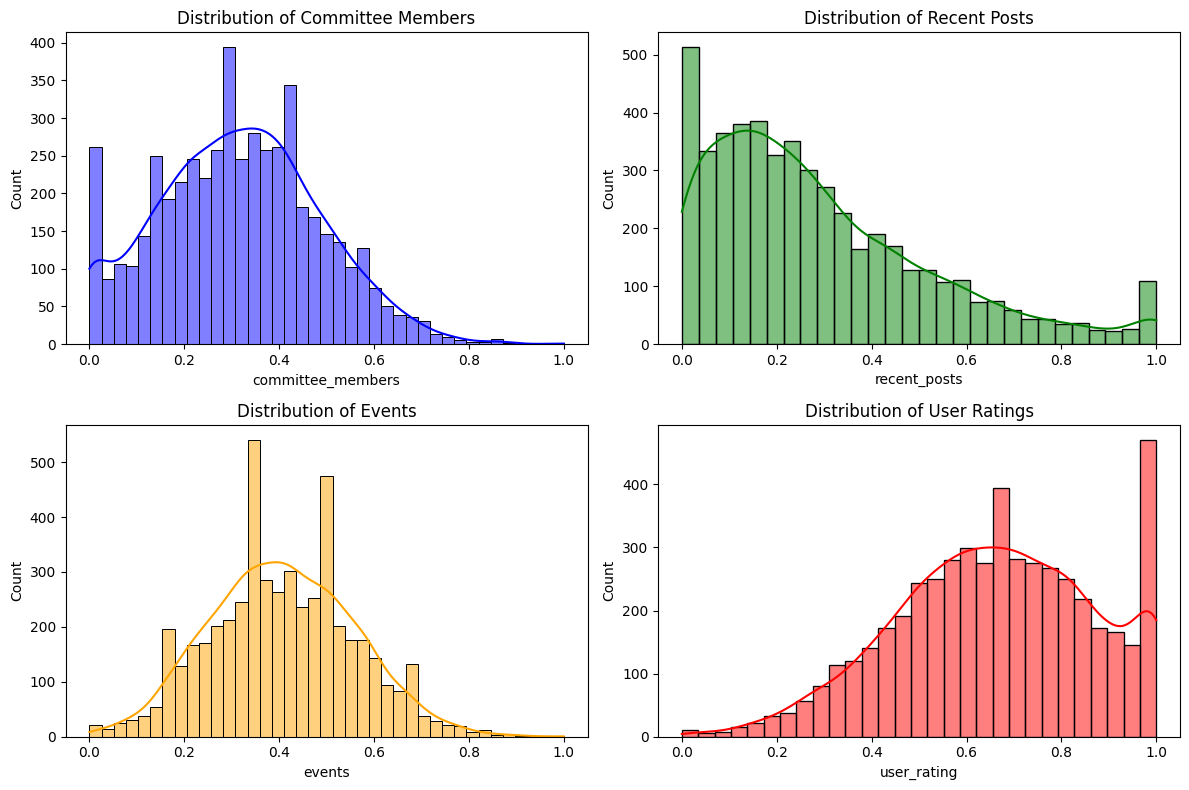

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7296\3505743398.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='committee_id', y='predicted_popularity', data=recommended_committees, palette='viridis')


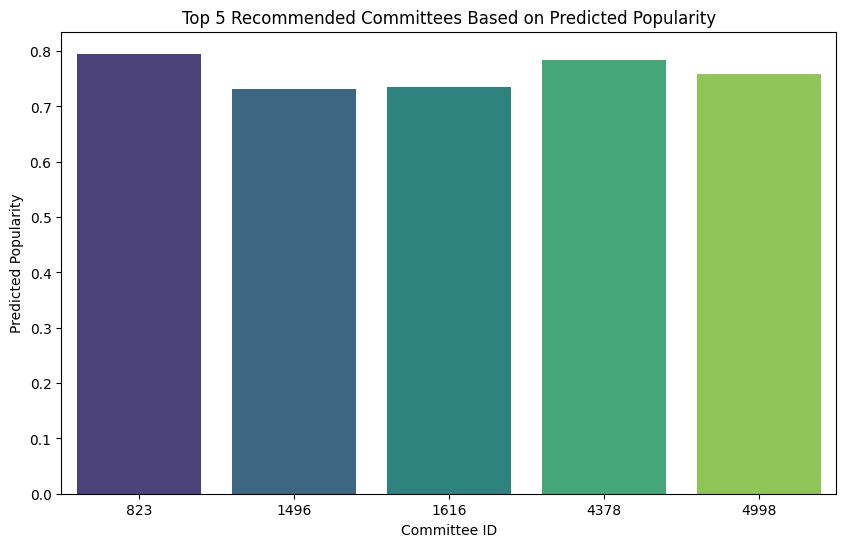

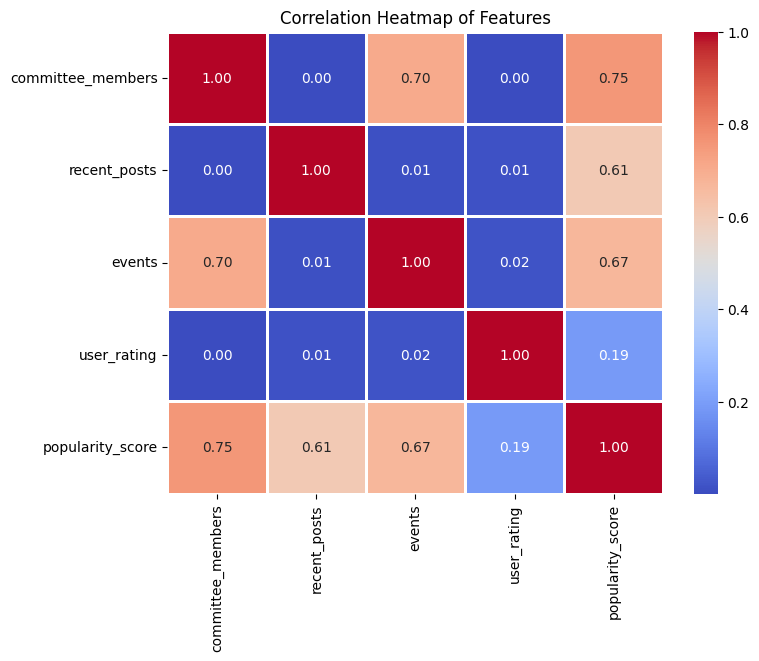

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Import the dataset from the CSV file
df = pd.read_csv('./dataset/committee_data_realistic.csv')

# Normalize the features
scaler = MinMaxScaler()
df[['committee_members', 'recent_posts', 'events', 'user_rating']] = scaler.fit_transform(df[['committee_members', 'recent_posts', 'events', 'user_rating']])

# Calculate the popularity score
df['popularity_score'] = (df['committee_members'] * 0.4 +
                          df['recent_posts'] * 0.3 +
                          df['events'] * 0.2 +
                          df['user_rating'] * 0.1)

# Split the dataset into features and target
X = df[['committee_members', 'recent_posts', 'events', 'user_rating']]  # Features
y = df['popularity_score']  # Target (popularity score)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict the popularity score for each committee
df['predicted_popularity'] = model.predict(X)

# Visualizing the raw data (distribution of features)
plt.figure(figsize=(12, 8))

# Distribution of committee members
plt.subplot(2, 2, 1)
sns.histplot(df['committee_members'], kde=True, color='blue')
plt.title('Distribution of Committee Members')

# Distribution of recent posts
plt.subplot(2, 2, 2)
sns.histplot(df['recent_posts'], kde=True, color='green')
plt.title('Distribution of Recent Posts')

# Distribution of events
plt.subplot(2, 2, 3)
sns.histplot(df['events'], kde=True, color='orange')
plt.title('Distribution of Events')

# Distribution of user ratings
plt.subplot(2, 2, 4)
sns.histplot(df['user_rating'], kde=True, color='red')
plt.title('Distribution of User Ratings')

plt.tight_layout()
plt.show()

# Visualizing the popularity score (Top N recommendations)
top_n = 5  # Number of committees to recommend
recommended_committees = df.sort_values(by='predicted_popularity', ascending=False).head(top_n)

# Bar plot for top committees by predicted popularity
plt.figure(figsize=(10, 6))
sns.barplot(x='committee_id', y='predicted_popularity', data=recommended_committees, palette='viridis')
plt.title('Top 5 Recommended Committees Based on Predicted Popularity')
plt.xlabel('Committee ID')
plt.ylabel('Predicted Popularity')
plt.show()

# Visualizing the correlation heatmap between features
correlation_matrix = df[['committee_members', 'recent_posts', 'events', 'user_rating', 'popularity_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Features')
plt.show()
